       SquareFootage    Bedrooms  Bathrooms          Price
count     100.000000  100.000000  100.00000     100.000000
mean     2361.000000    2.620000    1.94000  373330.010000
std       999.717324    1.117175    0.77616  149538.845012
min       584.000000    1.000000    1.00000  105680.000000
25%      1326.750000    2.000000    1.00000  223282.500000
50%      2541.000000    3.000000    2.00000  398289.000000
75%      3191.500000    4.000000    3.00000  503086.250000
max      3968.000000    4.000000    3.00000  616538.000000


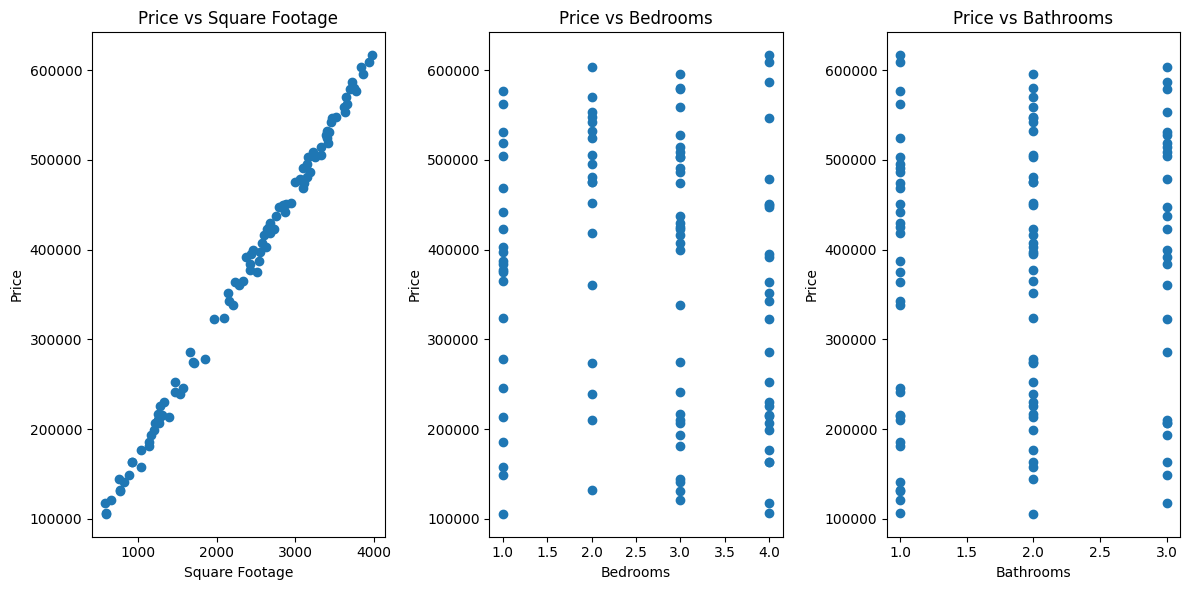

Mean Absolute Error: 6125.438544016763
R-squared: 0.9972172695302949
Predictions for new data:
[321178.58884842 479464.73422535]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing (Synthetic Data)
np.random.seed(0)
data_size = 100
square_footage = np.random.randint(500, 4000, data_size)
bedrooms = np.random.randint(1, 5, data_size)
bathrooms = np.random.randint(1, 4, data_size)
prices = (square_footage * 150) + (bedrooms * 5000) + (bathrooms * 3000) + np.random.randint(-10000, 10000, data_size)

# Create DataFrame
data = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})

# Step 3: Exploratory Data Analysis (EDA)
# Display basic statistics
print(data.describe())

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data['SquareFootage'], data['Price'])
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Price vs Square Footage')

plt.subplot(1, 3, 2)
plt.scatter(data['Bedrooms'], data['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')

plt.subplot(1, 3, 3)
plt.scatter(data['Bathrooms'], data['Price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')

plt.tight_layout()
plt.show()

# Step 4: Model Training
X = data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Step 6: Prediction
# Predict prices for new data
new_data = pd.DataFrame({
    'SquareFootage': [2000, 3000],
    'Bedrooms': [3, 4],
    'Bathrooms': [2, 3]
})
predictions = model.predict(new_data)
print("Predictions for new data:")
print(predictions)
